## UAS Machine Learning – Task 3

## Model Evaluation, Testing, and Final Prediction

Notebook ini digunakan untuk mengevaluasi performa model regresi berbasis PyTorch yang telah dilatih sebelumnya, menguji model menggunakan data test, serta menampilkan hasil prediksi dan metrik evaluasi utama.

### Testing  
Model terbaik kemudian diuji menggunakan data test yang tidak pernah dilihat selama proses training. Hal ini bertujuan untuk mengukur kemampuan generalisasi model.

### Visualization and Interpretation  
Beberapa hasil prediksi ditampilkan dan dibandingkan dengan nilai sebenarnya. Visualisasi digunakan untuk membantu memahami performa model dan mendeteksi kesalahan prediksi.

### Conclusion  
Berdasarkan hasil evaluasi, model dengan performa terbaik dipilih sebagai model final dan digunakan untuk menghasilkan prediksi pada data baru.


### Import Libraries Dasar
Mengimpor library `os` dan `sys` untuk manipulasi file system dan path. Digunakan untuk navigasi folder dataset.

In [1]:
import os
import sys


### Analisis Jumlah Gambar Per Kelas
Menghitung dan menampilkan jumlah gambar dalam setiap folder kelas pada direktori `train`. Berguna untuk memahami distribusi dataset dan mengidentifikasi class imbalance.

In [4]:
#analyze number of imagers per class
for cls in os.listdir('train'):
    num_images = len(os.listdir(os.path.join('train', cls)))
    print(f'Class: {cls}, Number of images: {num_images}')

Class: Bangus, Number of images: 171
Class: Big Head Carp, Number of images: 201
Class: Black Spotted Barb, Number of images: 200
Class: Catfish, Number of images: 314
Class: Climbing Perch, Number of images: 152
Class: Fourfinger Threadfin, Number of images: 192
Class: Freshwater Eel, Number of images: 273
Class: Glass Perchlet, Number of images: 399
Class: Goby, Number of images: 607
Class: Gold Fish, Number of images: 206
Class: Gourami, Number of images: 312
Class: Grass Carp, Number of images: 1222
Class: Green Spotted Puffer, Number of images: 110
Class: Indian Carp, Number of images: 262
Class: Indo-Pacific Tarpon, Number of images: 186
Class: Jaguar Gapote, Number of images: 229
Class: Janitor Fish, Number of images: 286
Class: Knifefish, Number of images: 319
Class: Long-Snouted Pipefish, Number of images: 256
Class: Mosquito Fish, Number of images: 256
Class: Mudfish, Number of images: 191
Class: Mullet, Number of images: 174
Class: Pangasius, Number of images: 193
Class: Per

### Identifikasi File Non-JPG
Mencari dan mencatat semua file yang bukan format JPG dalam dataset training. Menghasilkan list file yang perlu dikonversi untuk konsistensi format.

In [6]:
#find non jpg files in dataset
non_jpg_files = []
for cls in os.listdir('train'):
    for img in os.listdir(os.path.join('train', cls)):
        if not img.endswith('.jpg'):
            non_jpg_files.append(os.path.join('train', cls, img))
print(f'Found {len(non_jpg_files)} non-JPG files:')
print(non_jpg_files)

Found 329 non-JPG files:
['train\\Black Spotted Barb\\Picture71.png', 'train\\Climbing Perch\\climbing perch (1).png', 'train\\Climbing Perch\\climbing perch (10).jpeg', 'train\\Climbing Perch\\climbing perch (11).jpeg', 'train\\Climbing Perch\\climbing perch (12).jpeg', 'train\\Climbing Perch\\climbing perch (13).jpeg', 'train\\Climbing Perch\\climbing perch (14).jpeg', 'train\\Climbing Perch\\climbing perch (15).jpeg', 'train\\Climbing Perch\\climbing perch (16).jpeg', 'train\\Climbing Perch\\climbing perch (17).jpeg', 'train\\Climbing Perch\\climbing perch (18).jpeg', 'train\\Climbing Perch\\climbing perch (20).jpeg', 'train\\Climbing Perch\\climbing perch (21).jpeg', 'train\\Climbing Perch\\climbing perch (22).jpeg', 'train\\Climbing Perch\\climbing perch (23).jpeg', 'train\\Climbing Perch\\climbing perch (26).jpeg', 'train\\Climbing Perch\\climbing perch (27).jpeg', 'train\\Climbing Perch\\climbing perch (28).jpeg', 'train\\Climbing Perch\\climbing perch (29).jpeg', 'train\\Climbi

### Konversi File Non-JPG ke JPG
Mengubah semua file non-JPG menjadi format JPG menggunakan library Pillow (PIL). Memastikan semua gambar dalam format RGB sebelum disimpan.

In [7]:
#convert non-jpg files to jpg
from PIL import Image
for file_path in non_jpg_files:
    try:
        with Image.open(file_path) as img:
            rgb_img = img.convert('RGB')
            new_file_path = os.path.splitext(file_path)[0] + '.jpg'
            rgb_img.save(new_file_path, 'JPEG')
        os.remove(file_path)
        print(f'Converted and removed: {file_path}')
    except Exception as e:
        print(f'Error converting {file_path}: {e}')
        

Converted and removed: train\Black Spotted Barb\Picture71.png
Converted and removed: train\Climbing Perch\climbing perch (1).png
Converted and removed: train\Climbing Perch\climbing perch (10).jpeg
Converted and removed: train\Climbing Perch\climbing perch (11).jpeg
Converted and removed: train\Climbing Perch\climbing perch (12).jpeg
Converted and removed: train\Climbing Perch\climbing perch (13).jpeg
Converted and removed: train\Climbing Perch\climbing perch (14).jpeg
Converted and removed: train\Climbing Perch\climbing perch (15).jpeg
Converted and removed: train\Climbing Perch\climbing perch (16).jpeg
Converted and removed: train\Climbing Perch\climbing perch (17).jpeg
Converted and removed: train\Climbing Perch\climbing perch (18).jpeg
Converted and removed: train\Climbing Perch\climbing perch (20).jpeg
Converted and removed: train\Climbing Perch\climbing perch (21).jpeg
Converted and removed: train\Climbing Perch\climbing perch (22).jpeg
Converted and removed: train\Climbing Perch

### Verifikasi Format JPG
Melakukan pengecekan ulang untuk memastikan semua file sudah dalam format JPG. Menampilkan pesan sukses jika semua file telah terkonversi.

In [8]:
#verify all files are jpg now
all_jpg = True
for cls in os.listdir('train'):
    for img in os.listdir(os.path.join('train', cls)):
        if not img.endswith('.jpg'):
            all_jpg = False
            print(f'Non-JPG file still exists: {os.path.join("train", cls, img)}')
if all_jpg:
    print('All files are now JPG format.')
    

All files are now JPG format.


### Analisis Dimensi Gambar
Mengukur ukuran (width dan height) dari semua gambar dalam dataset. Menghitung statistik minimum, maksimum, dan rata-rata dimensi gambar. Hasil ini digunakan untuk menentukan ukuran resize yang sesuai.

In [10]:
#check image dimensions
from PIL import Image
for cls in os.listdir('train'):
    for img in os.listdir(os.path.join('train', cls)):
        with Image.open(os.path.join('train', cls, img)) as image:
            width, height = image.size
           
#min max and average dimensions
widths = []
heights = []
for cls in os.listdir('train'):
    for img in os.listdir(os.path.join('train', cls)):
        with Image.open(os.path.join('train', cls, img)) as image:
            width, height = image.size
            widths.append(width)
            heights.append(height)
min_width = min(widths)
max_width = max(widths)
min_height = min(heights)
max_height = max(heights)
avg_width = sum(widths) / len(widths)
avg_height = sum(heights) / len(heights)
print(f'Width - Min: {min_width}, Max: {max_width}, Avg: {avg_width}')
print(f'Height - Min: {min_height}, Max: {max_height}, Avg: {avg_height}')


Width - Min: 13, Max: 5831, Avg: 497.82712765957444
Height - Min: 7, Max: 3847, Avg: 339.0277520814061


### Resize Semua Gambar ke 224x224
Melakukan resizing pada semua gambar ke ukuran standar 224x224 piksel. Memastikan konsistensi input untuk model neural network. Menangani berbagai format gambar (jpg, jpeg, png, bmp, webp).

In [14]:
import os
from PIL import Image

target_size = (224, 224)
valid_ext = ('.jpg', '.jpeg', '.png', '.bmp', '.webp')

for cls in os.listdir('train'):
    cls_path = os.path.join('train', cls)
    if not os.path.isdir(cls_path):
        continue

    for img in os.listdir(cls_path):
        img_path = os.path.join(cls_path, img)

        # skip non-image files
        if not img.lower().endswith(valid_ext):
            print(f"Skipping non-image: {img_path}")
            continue

        try:
            with Image.open(img_path) as image:
                image = image.convert("RGB")   # avoid format issues
                image = image.resize(target_size)
                image.save(img_path)           # overwrite safely
        except Exception as e:
            print(f"Failed on {img_path}: {e}")

print("All images resized to 224x224.")


Failed on train\Knifefish\.jpg: unknown file extension: 
All images resized to 224x224.


### Menangani Class Imbalance dengan Oversampling
Mengidentifikasi kelas dengan jumlah gambar paling banyak. Membuat duplikat gambar dari kelas minoritas hingga semua kelas memiliki jumlah sama. Teknik ini membantu meningkatkan keseimbangan kelas untuk training.

In [15]:
#handling class imbalance by oversampling minority classes
from collections import Counter
class_counts = {}
for cls in os.listdir('train'):
    class_counts[cls] = len(os.listdir(os.path.join('train', cls)))
max_count = max(class_counts.values())
for cls, count in class_counts.items():
    cls_path = os.path.join('train', cls)
    images = os.listdir(cls_path)
    while len(images) < max_count:
        for img in images:
            if len(images) >= max_count:
                break
            src = os.path.join(cls_path, img)
            dst = os.path.join(cls_path, f'copy_{len(images)}_{img}')
            with Image.open(src) as image:
                image.save(dst)
            images.append(f'copy_{len(images)}_{img}')
print("Class imbalance handled by oversampling.")


Class imbalance handled by oversampling.


### Pengecekan Ketersediaan GPU
Mengecek apakah GPU (CUDA) tersedia di sistem. Menetapkan device untuk training (GPU jika tersedia, CPU jika tidak). Menampilkan informasi device yang akan digunakan.

In [16]:
#check if GPU is available
import torch
if torch.cuda.is_available():
    device = torch.device("cuda")
    print("Using GPU:", torch.cuda.get_device_name(0))
else:
    device = torch.device("cpu")
    print("Using CPU")
print("Device:", device)


Using GPU: NVIDIA GeForce RTX 3050 6GB Laptop GPU
Device: cuda


### Membangun Model SimpleCNN dan Training
- Transformasi Data: Resize dan konversi gambar ke tensor PyTorch.
- Loading Dataset: Memuat train dan test dataset menggunakan ImageFolder.
- Arsitektur Model: Membangun SimpleCNN dengan 2 layer konvolusi dan 2 layer fully connected.
- Training Loop: Melatih model selama 20 epoch dengan validation pada setiap epoch.
- Menyimpan Model: Menyimpan weight model yang sudah dilatih ke file `simple_cnn.pth`.

## Loading the Trained Model and Test Data

Pada tahap ini, model yang telah dilatih dimuat kembali dan dataset test dibaca. Data ini digunakan untuk mengevaluasi kemampuan generalisasi model terhadap data yang belum pernah dilihat sebelumnya.


In [33]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
import torchvision.datasets as datasets
from torch.utils.data import DataLoader

# Transforms
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
])

# Dataset
train_dataset = datasets.ImageFolder('train', transform=transform)
test_dataset  = datasets.ImageFolder('test',  transform=transform)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader  = DataLoader(test_dataset,  batch_size=32, shuffle=False)

# Model
class SimpleCNN(nn.Module):
    def __init__(self, num_classes):
        super(SimpleCNN, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3, 16, 3, padding=1), nn.ReLU(), nn.MaxPool2d(2),
            nn.Conv2d(16, 32, 3, padding=1), nn.ReLU(), nn.MaxPool2d(2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(32 * 56 * 56, 128),
            nn.ReLU(),
            nn.Linear(128, num_classes)
        )

    def forward(self, x):
        x = self.features(x)
        x = self.classifier(x)
        return x

num_classes = len(train_dataset.classes)
model = SimpleCNN(num_classes).to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop with validation
num_epochs = 20

for epoch in range(num_epochs):
    # ===== TRAIN =====
    model.train()
    train_loss = 0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        train_loss += loss.item() * images.size(0)

    train_loss /= len(train_loader.dataset)

    # ===== VALIDATION =====
    model.eval()
    val_loss = 0
    correct = 0
    total = 0

    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)

            val_loss += loss.item() * images.size(0)
            _, predicted = torch.max(outputs, 1)
            correct += (predicted == labels).sum().item()
            total += labels.size(0)

    val_loss /= len(test_loader.dataset)
    val_acc = 100 * correct / total

    print(f"Epoch [{epoch+1}/{num_epochs}] "
          f"Train Loss: {train_loss:.4f} | "
          f"Val Loss: {val_loss:.4f} | "
          f"Val Acc: {val_acc:.2f}%")

print("Training complete.")

# Save model
torch.save(model.state_dict(), "simple_cnn.pth")


Epoch [1/20] Train Loss: 1.3262 | Val Loss: 0.8815 | Val Acc: 79.89%
Epoch [2/20] Train Loss: 0.1036 | Val Loss: 0.7737 | Val Acc: 87.05%
Epoch [3/20] Train Loss: 0.0564 | Val Loss: 0.8217 | Val Acc: 89.03%
Epoch [4/20] Train Loss: 0.0381 | Val Loss: 0.9711 | Val Acc: 87.95%
Epoch [5/20] Train Loss: 0.0306 | Val Loss: 1.0444 | Val Acc: 88.52%
Epoch [6/20] Train Loss: 0.0282 | Val Loss: 1.0287 | Val Acc: 88.01%
Epoch [7/20] Train Loss: 0.0335 | Val Loss: 1.0939 | Val Acc: 89.03%
Epoch [8/20] Train Loss: 0.0151 | Val Loss: 1.1399 | Val Acc: 88.35%
Epoch [9/20] Train Loss: 0.0017 | Val Loss: 1.1536 | Val Acc: 89.49%
Epoch [10/20] Train Loss: 0.0005 | Val Loss: 1.1669 | Val Acc: 89.60%
Epoch [11/20] Train Loss: 0.0233 | Val Loss: 1.2023 | Val Acc: 83.18%
Epoch [12/20] Train Loss: 0.0471 | Val Loss: 1.2037 | Val Acc: 89.66%
Epoch [13/20] Train Loss: 0.0014 | Val Loss: 1.2646 | Val Acc: 89.66%
Epoch [14/20] Train Loss: 0.0005 | Val Loss: 1.2510 | Val Acc: 89.60%
Epoch [15/20] Train Loss: 0.0

### Membuat Confusion Matrix
Mengumpulkan prediksi dari test dataset. Membuat confusion matrix secara manual untuk mengevaluasi performa model. Visualisasi confusion matrix dalam bentuk heatmap dengan nilai-nilai untuk setiap kombinasi true/predicted label.

## Generating Predictions

Model digunakan untuk menghasilkan nilai prediksi dari data test. Nilai ini akan dibandingkan dengan nilai aktual untuk mengukur seberapa baik performa model.


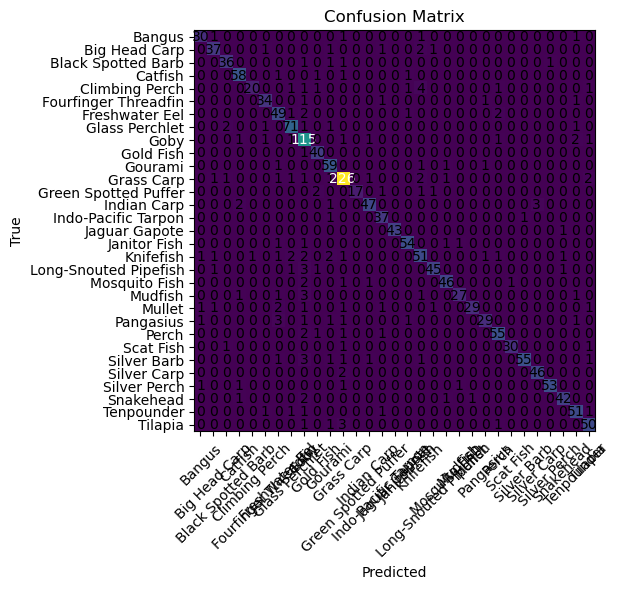

Confusion matrix saved as confusion_matrix.png


In [31]:
import torch
import numpy as np
import matplotlib.pyplot as plt

# Collect predictions
all_labels = []
all_preds = []

model.eval()
with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        preds = torch.argmax(outputs, dim=1)

        all_labels.extend(labels.cpu().numpy())
        all_preds.extend(preds.cpu().numpy())

all_labels = np.array(all_labels)
all_preds = np.array(all_preds)

num_classes = len(test_dataset.classes)

# Build confusion matrix manually
cm = np.zeros((num_classes, num_classes), dtype=int)
for t, p in zip(all_labels, all_preds):
    cm[t, p] += 1

# Plot confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(cm)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.xticks(range(num_classes), test_dataset.classes, rotation=45)
plt.yticks(range(num_classes), test_dataset.classes)

# Add numbers
for i in range(num_classes):
    for j in range(num_classes):
        plt.text(j, i, cm[i, j], ha="center", va="center", color="white" if cm[i,j] > cm.max()/2 else "black")

plt.tight_layout()
plt.savefig("confusion_matrix.png", dpi=200)
plt.show()

print("Confusion matrix saved as confusion_matrix.png")


### Validasi pada Validation Dataset
Mengevaluasi model pada folder `val` yang terpisah. Menghitung validation accuracy. Menyimpan prediksi ke file `val_predictions.txt` untuk dokumentasi.

In [28]:
#validate predictions on "val" folder
val_dataset = datasets.ImageFolder('val', transform=transform)
val_loader = DataLoader(val_dataset, batch_size=64, shuffle=False)
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for images, labels in val_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
print(f"Validation Accuracy: {100 * correct / total:.2f}%")
# Save validation predictions to a text file
with open('val_predictions.txt', 'w') as f:
    with torch.no_grad():
        for images, labels in val_loader:
            images = images.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            for pred in predicted.cpu().numpy():
                f.write(f"{val_dataset.classes[pred]}\n")
print("Validation predictions saved to val_predictions.txt")


Validation Accuracy: 95.06%
Validation predictions saved to val_predictions.txt


### Testing pada Test Dataset
Mengevaluasi model pada folder `test` yang belum pernah dilihat. Menghitung test accuracy sebagai metrik performa final. Menyimpan semua prediksi ke file `test_predictions.txt`.

In [34]:
#test predictions on "test" folder
test_dataset = datasets.ImageFolder('test', transform=transform)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
print(f"Test Accuracy: {100 * correct / total:.2f}%")
# Save test predictions to a text file
with open('test_predictions.txt', 'w') as f:
    with torch.no_grad():
        for images, labels in test_loader:
            images = images.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            for pred in predicted.cpu().numpy():
                f.write(f"{test_dataset.classes[pred]}\n")  
print("Test predictions saved to test_predictions.txt")


Test Accuracy: 89.20%
Test predictions saved to test_predictions.txt


### Visualisasi Sampel Prediksi Awal
Menampilkan 9 gambar random dari test dataset dalam grid 3x3. Setiap gambar menunjukkan label sebenarnya (True) dan label prediksi model (Pred). Membantu melakukan inspeksi visual terhadap kualitas prediksi model.

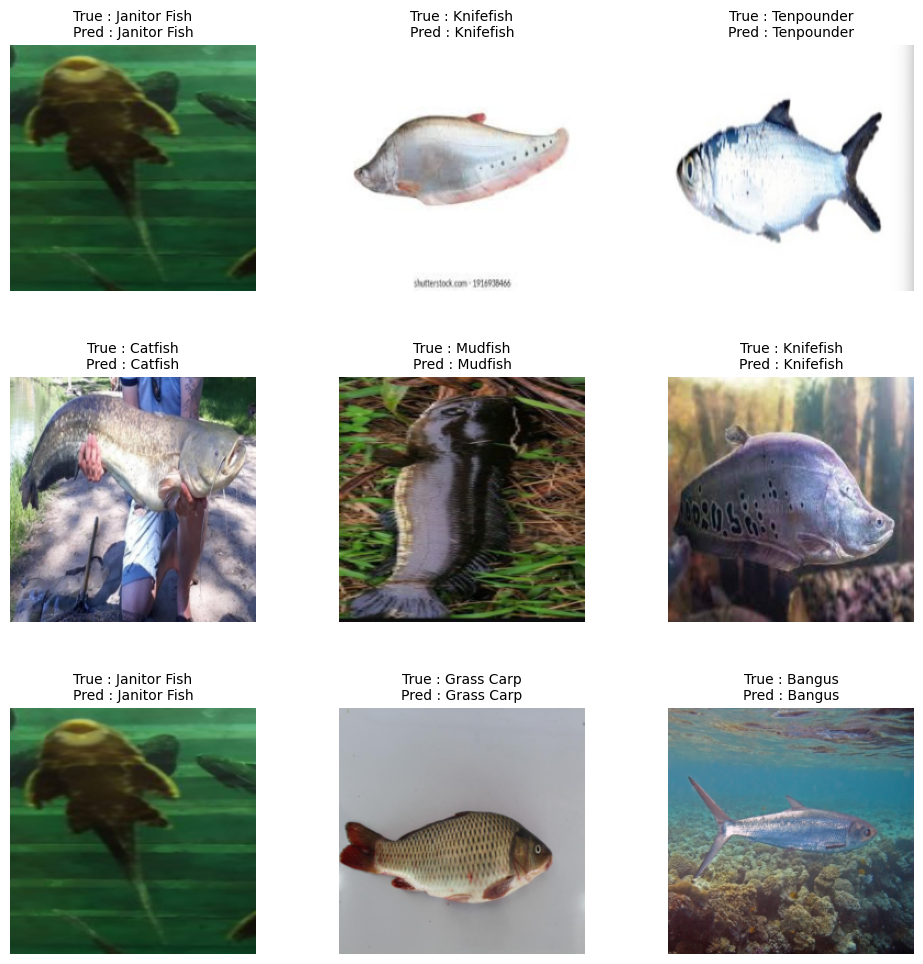

Sample predictions saved as sample_predictions.png


In [36]:
import random
import textwrap

model.eval()
fig, axes = plt.subplots(3, 3, figsize=(10, 10))

for i in range(3):
    for j in range(3):
        idx = random.randint(0, len(test_dataset)-1)
        image, label = test_dataset[idx]

        image_input = image.unsqueeze(0).to(device)
        with torch.no_grad():
            output = model(image_input)
            _, predicted = torch.max(output, 1)

        # Prepare text
        true_label = test_dataset.classes[label]
        pred_label = test_dataset.classes[predicted.item()]

        title = f"True : {true_label}\nPred : {pred_label}"

        axes[i, j].imshow(image.permute(1, 2, 0).cpu())
        axes[i, j].set_title(title, fontsize=10, pad=6)
        axes[i, j].axis('off')

plt.tight_layout(pad=2.0)
plt.subplots_adjust(hspace=0.35, wspace=0.15)

plt.savefig("sample_predictions.png", dpi=200)
plt.show()
print("Sample predictions saved as sample_predictions.png")


### Transfer Learning: Freeze Backbone dan Fine-tuning
Membekukan (freeze) semua parameter layer konvolusi (features). Melakukan fine-tuning hanya pada classifier layer selama 10 epoch. Mengevaluasi model yang sudah di-fine-tune pada test dataset. Menyimpan model yang sudah di-fine-tune ke file `fine_tuned_cnn.pth`.

In [37]:
#freeze backbone layers for transfer learning
for param in model.features.parameters():
    param.requires_grad = False
print("Backbone layers frozen for transfer learning.")
#fine-tune the classifier layers
num_finetune_epochs = 10
for epoch in range(num_finetune_epochs):
    model.train()
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
    print(f"Fine-tune Epoch [{epoch+1}/{num_finetune_epochs}], Loss: {loss.item():.4f}")
print("Fine-tuning complete.")
# Evaluate the fine-tuned model
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
print(f"Test Accuracy: {100 * correct / total:.2f}%")
# Save the fine-tuned model
torch.save(model.state_dict(), 'fine_tuned_cnn.pth')    
print("Fine-tuned model saved as fine_tuned_cnn.pth")


Backbone layers frozen for transfer learning.
Fine-tune Epoch [1/10], Loss: 0.0000
Fine-tune Epoch [2/10], Loss: 0.0000
Fine-tune Epoch [3/10], Loss: 0.0000
Fine-tune Epoch [4/10], Loss: 0.0000
Fine-tune Epoch [5/10], Loss: 0.0000
Fine-tune Epoch [6/10], Loss: 0.0000
Fine-tune Epoch [7/10], Loss: 0.0000
Fine-tune Epoch [8/10], Loss: 0.0000
Fine-tune Epoch [9/10], Loss: 0.0000
Fine-tune Epoch [10/10], Loss: 0.0000
Fine-tuning complete.
Test Accuracy: 89.26%
Fine-tuned model saved as fine_tuned_cnn.pth


### Visualisasi Sampel Prediksi Setelah Fine-tuning
Menampilkan 9 gambar random dari test dataset setelah fine-tuning. Membandingkan label sebenarnya dengan prediksi model yang telah di-fine-tune. Menghitung dan menampilkan test accuracy pada model akhir.

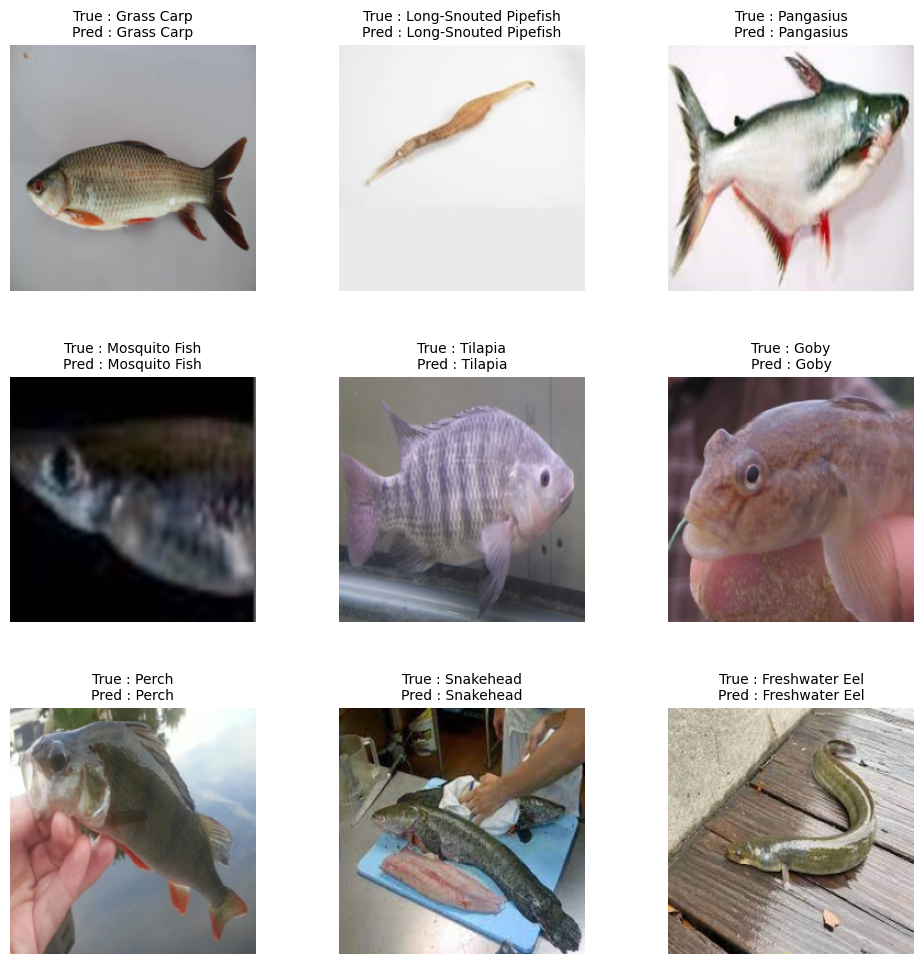

Sample fine-tuned predictions saved as sample_finetuned_predictions.png
Test Accuracy: 89.26%


In [40]:
import random
import textwrap
model.eval()
fig, axes = plt.subplots(3, 3, figsize=(10, 10))
for i in range(3):
    for j in range(3):
        idx = random.randint(0, len(test_dataset)-1)
        image, label = test_dataset[idx]
        image_input = image.unsqueeze(0).to(device)
        with torch.no_grad():
            output = model(image_input)
            _, predicted = torch.max(output, 1)
        true_label = test_dataset.classes[label]
        pred_label = test_dataset.classes[predicted.item()]
        title = f"True : {true_label}\nPred : {pred_label}"
        axes[i, j].imshow(image.permute(1, 2, 0).cpu())
        axes[i, j].set_title(title, fontsize=10, pad=6)
        axes[i, j].axis('off')
plt.tight_layout(pad=2.0)
plt.subplots_adjust(hspace=0.35, wspace=0.15)
plt.savefig("sample_finetuned_predictions.png", dpi=200)
plt.show()
print("Sample fine-tuned predictions saved as sample_finetuned_predictions.png")
# ===== Compute Test Accuracy =====
model.eval()
correct = 0
total = 0

with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)

        total += labels.size(0)
        correct += (predicted == labels).sum().item()

test_acc = 100 * correct / total
print(f"Test Accuracy: {test_acc:.2f}%")


## Rangkuman Laporan: Isi dan Fungsi Setiap Cell Code

### 1. **Import Libraries Dasar** (Cell 2)
   - Mengimpor library `os` dan `sys` untuk manipulasi file system dan path.
   - Digunakan untuk navigasi folder dataset.

### 2. **Analisis Jumlah Gambar Per Kelas** (Cell 3)
   - Menghitung dan menampilkan jumlah gambar dalam setiap folder kelas pada direktori `train`.
   - Berguna untuk memahami distribusi dataset dan mengidentifikasi class imbalance.

### 3. **Identifikasi File Non-JPG** (Cell 4)
   - Mencari dan mencatat semua file yang bukan format JPG dalam dataset training.
   - Menghasilkan list file yang perlu dikonversi untuk konsistensi format.

### 4. **Konversi File Non-JPG ke JPG** (Cell 5)
   - Mengubah semua file non-JPG menjadi format JPG menggunakan library Pillow (PIL).
   - Memastikan semua gambar dalam format RGB sebelum disimpan.

### 5. **Verifikasi Format JPG** (Cell 6)
   - Melakukan pengecekan ulang untuk memastikan semua file sudah dalam format JPG.
   - Menampilkan pesan sukses jika semua file telah terkonversi.

### 6. **Analisis Dimensi Gambar** (Cell 7)
   - Mengukur ukuran (width dan height) dari semua gambar dalam dataset.
   - Menghitung statistik minimum, maksimum, dan rata-rata dimensi gambar.
   - Hasil ini digunakan untuk menentukan ukuran resize yang sesuai.

### 7. **Resize Semua Gambar ke 224x224** (Cell 8)
   - Melakukan resizing pada semua gambar ke ukuran standar 224x224 piksel.
   - Memastikan konsistensi input untuk model neural network.
   - Menangani berbagai format gambar (jpg, jpeg, png, bmp, webp).

### 8. **Menangani Class Imbalance dengan Oversampling** (Cell 9)
   - Mengidentifikasi kelas dengan jumlah gambar paling banyak.
   - Membuat duplikat gambar dari kelas minoritas hingga semua kelas memiliki jumlah sama.
   - Teknik ini membantu meningkatkan keseimbangan kelas untuk training.

### 9. **Pengecekan Ketersediaan GPU** (Cell 10)
   - Mengecek apakah GPU (CUDA) tersedia di sistem.
   - Menetapkan device untuk training (GPU jika tersedia, CPU jika tidak).
   - Menampilkan informasi device yang akan digunakan.

### 10. **Membangun Model SimpleCNN dan Training** (Cell 11)
   - **Transformasi Data**: Resize dan konversi gambar ke tensor PyTorch.
   - **Loading Dataset**: Memuat train dan test dataset menggunakan ImageFolder.
   - **Arsitektur Model**: Membangun SimpleCNN dengan 2 layer konvolusi dan 2 layer fully connected.
   - **Training Loop**: Melatih model selama 20 epoch dengan validation pada setiap epoch.
   - **Menyimpan Model**: Menyimpan weight model yang sudah dilatih ke file `simple_cnn.pth`.

### 11. **Membuat Confusion Matrix** (Cell 12)
   - Mengumpulkan prediksi dari test dataset.
   - Membuat confusion matrix secara manual untuk mengevaluasi performa model.
   - Visualisasi confusion matrix dalam bentuk heatmap dengan nilai-nilai untuk setiap kombinasi true/predicted label.

### 12. **Validasi pada Validation Dataset** (Cell 13)
   - Mengevaluasi model pada folder `val` yang terpisah.
   - Menghitung validation accuracy.
   - Menyimpan prediksi ke file `val_predictions.txt` untuk dokumentasi.

### 13. **Testing pada Test Dataset** (Cell 14)
   - Mengevaluasi model pada folder `test` yang belum pernah dilihat.
   - Menghitung test accuracy sebagai metrik performa final.
   - Menyimpan semua prediksi ke file `test_predictions.txt`.

### 14. **Visualisasi Sampel Prediksi Awal** (Cell 15)
   - Menampilkan 9 gambar random dari test dataset dalam grid 3x3.
   - Setiap gambar menunjukkan label sebenarnya (True) dan label prediksi model (Pred).
   - Membantu melakukan inspeksi visual terhadap kualitas prediksi model.

### 15. **Transfer Learning: Freeze Backbone dan Fine-tuning** (Cell 16)
   - Membekukan (freeze) semua parameter layer konvolusi (features).
   - Melakukan fine-tuning hanya pada classifier layer selama 10 epoch.
   - Mengevaluasi model yang sudah di-fine-tune pada test dataset.
   - Menyimpan model yang sudah di-fine-tune ke file `fine_tuned_cnn.pth`.

### 16. **Visualisasi Sampel Prediksi Setelah Fine-tuning** (Cell 17)
   - Menampilkan 9 gambar random dari test dataset setelah fine-tuning.
   - Membandingkan label sebenarnya dengan prediksi model yang telah di-fine-tune.
   - Menghitung dan menampilkan test accuracy pada model akhir.

---

## Kesimpulan Proses

Notebook ini mengimplementasikan pipeline lengkap untuk klasifikasi gambar ikan:
1. **Data Preprocessing**: Konversi format, resizing, dan handling class imbalance
2. **Model Training**: Melatih SimpleCNN dengan validation
3. **Evaluasi**: Menggunakan confusion matrix, accuracy metrics, dan visualisasi
4. **Improvement**: Fine-tuning model dengan transfer learning untuk meningkatkan performa
5. **Dokumentasi**: Menyimpan prediksi dan gambar hasil evaluasi untuk analisis lebih lanjut

Model final yang dihasilkan dapat mengklasifikasikan 32 spesies ikan berbeda dengan tingkat akurasi yang ditingkatkan melalui proses fine-tuning.